<a href="https://colab.research.google.com/github/ivbeletsky/MCS101-011-ivbeletsky-Wikimedium/blob/master/NCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
data = pd.read_excel('NCD_2.xlsx')

In [15]:
data

approved_names = ['AGRICULTURAL BANK OF CHINA', 'China Construction Bank Corporation', 'BANK OF CHINA', 'ICBC']
approved_maturity_days = 130


In [16]:
data_filtered = data.query('Issuer in @approved_names' and 'Days_to_maturity <= @approved_maturity_days')

In [17]:
data_filtered

,Symbol,Short Name,Estimated Yield (SHCH)\n[Date] Last Closing Day,Issuer,Listing Date,Maturity Date,Days_to_maturity
0,112203049.IB,AGRICULTURAL BANK OF CHINA B230523,1.7578,AGRICULTURAL BANK OF CHINA,2022-05-23,2023-05-23,1.0
1,112205076.IB,CCB B230523,1.8205,China Construction Bank Corporation,2022-05-23,2023-05-23,1.0
2,112305080.IB,CCB B230523,1.6632,China Construction Bank Corporation,2023-04-23,2023-05-23,1.0
3,112203079.IB,AGRICULTURAL BANK OF CHINA B230524,1.7024,AGRICULTURAL BANK OF CHINA,2022-08-24,2023-05-24,2.0
4,112205077.IB,CCB B230524,1.8772,China Construction Bank Corporation,2022-05-24,2023-05-24,2.0
...,...,...,...,...,...,...,...
6723,112205152.IB,CCB B230919,2.2620,China Construction Bank Corporation,2022-09-19,2023-09-19,120.0
6724,112205153.IB,CCB B230920,2.2116,China Construction Bank Corporation,2022-09-20,2023-09-20,121.0
6725,112202009.IB,ICBC B230922,2.2841,ICBC,2022-12-22,2023-09-22,123.0
6726,112205154.IB,CCB B230926,2.1810,China Construction Bank Corporation,2022-09-26,2023-09-26,127.0


In [18]:
def mean_yield(approved_names):
  for index in approved_names:
    print(index,':',data_filtered.query('Issuer == @index')['Estimated Yield (SHCH)\n[Date] Last Closing Day'].mean().round(3))


def mean_maturity(approved_names):
  for index in approved_names:
    print(index,':',data_filtered.query('Issuer == @index')['Days_to_maturity'].mean().round(3))



def ncd_count(approved_names):
  for index in approved_names:
    print(index,':',data_filtered.query('Issuer == @index')['Symbol'].count().round(3))



In [19]:
mean_yield(approved_names)
print()
mean_maturity(approved_names)
print()
ncd_count(approved_names)

AGRICULTURAL BANK OF CHINA : 2.076
China Construction Bank Corporation : 2.057
BANK OF CHINA : 2.085
ICBC : 2.145

AGRICULTURAL BANK OF CHINA : 53.615
China Construction Bank Corporation : 50.544
BANK OF CHINA : 60.375
ICBC : 71.75

AGRICULTURAL BANK OF CHINA : 78
China Construction Bank Corporation : 68
BANK OF CHINA : 16
ICBC : 8


<Axes: xlabel='Estimated Yield (SHCH)\n[Date] Last Closing Day', ylabel='Days_to_maturity'>

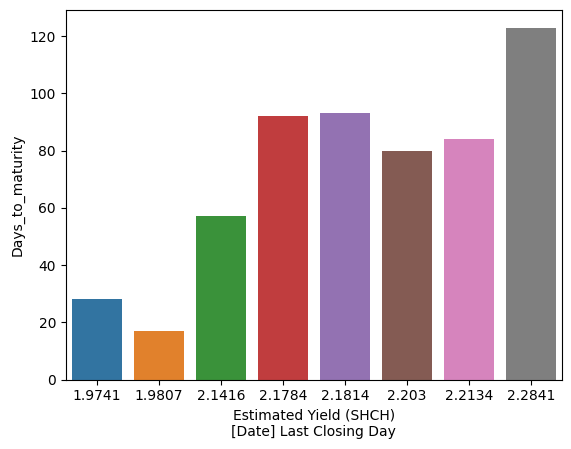

In [20]:
import seaborn
icbc = data_filtered.query('Issuer == "ICBC"')
seaborn.barplot(data = icbc,x = 'Estimated Yield (SHCH)\n[Date] Last Closing Day', y='Days_to_maturity')

In [25]:
fig = px.scatter(x =data_filtered['Estimated Yield (SHCH)\n[Date] Last Closing Day'], y = data_filtered['Days_to_maturity'] )
fig.show()

fig = px.scatter(data_filtered, x="Estimated Yield (SHCH)\n[Date] Last Closing Day", y="Days_to_maturity", color="Issuer",
                 )
fig.show()